## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.
* Modularized the previous code

---
# Camera Calibration

## Step1: I'll compute the camera calibration using chessboard images

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib qt

### Find the Chessboard Corners

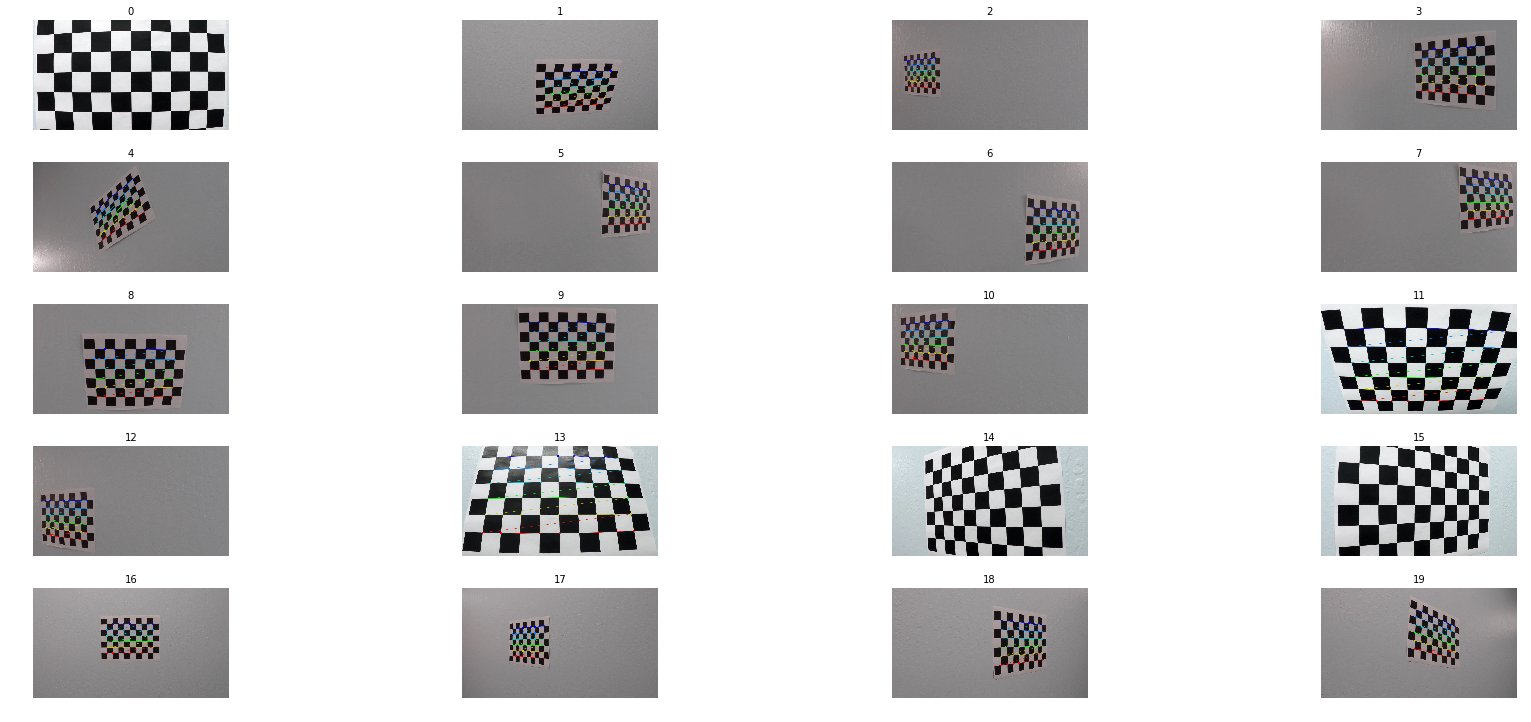

In [3]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

# Plot the result
fig, axs = plt.subplots(5, 4, figsize=(24, 10))  #axs[20]
axs = axs.flatten()

# fig.subplots_adjust(left=0.2, bottom=0.2, right=0.8, top=0.8, hspace=0.2, wspace=0.1)
fig.tight_layout()
# Step through the list and search for chessboard corners

serial_number = 0
for i, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
    
    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)

    axs[i].axis("off")
    axs[i].imshow(img)
    axs[i].set_title(str(i), fontsize=10)

### Compute the camera calibration

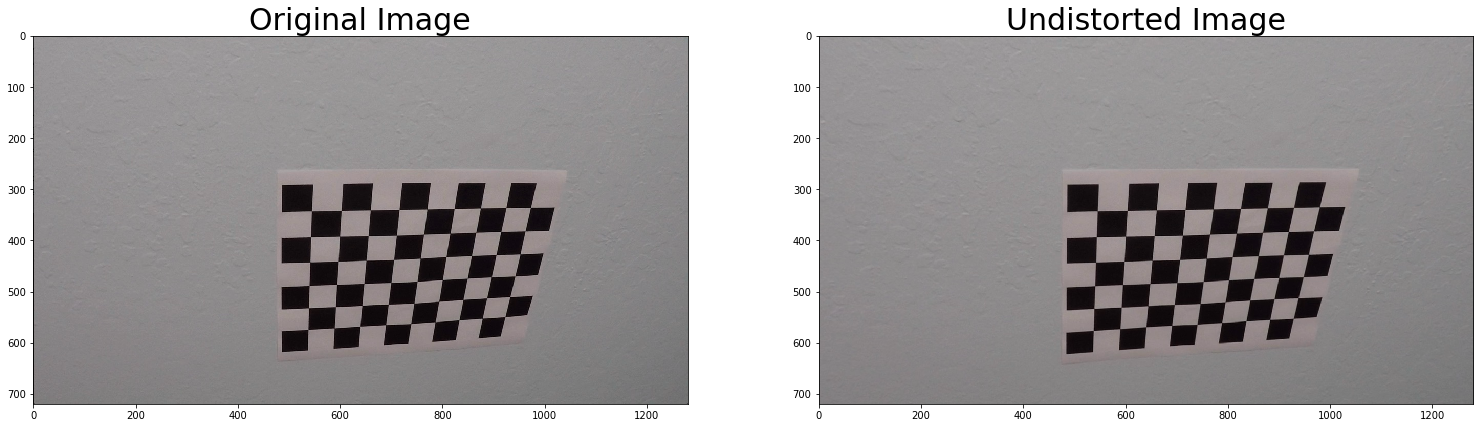

In [4]:
import pickle

# Test undistortion on an image
img = cv2.imread('./camera_cal/calibration10.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('./camera_cal/test_undist_10.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
dist_pickle["ret"] = ret
dist_pickle["rvecs"] = rvecs
dist_pickle["tvecs"] = tvecs
pickle.dump( dist_pickle, open( "./camera_cal/wide_dist_pickle.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
fig, axs = plt.subplots(1, 2, figsize=(20,10))
axs[0].imshow(img)
axs[0].set_title('Original Image', fontsize=30)
axs[1].imshow(dst)
axs[1].set_title('Undistorted Image', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Step2: I'll apply a distortion correction to raw images.

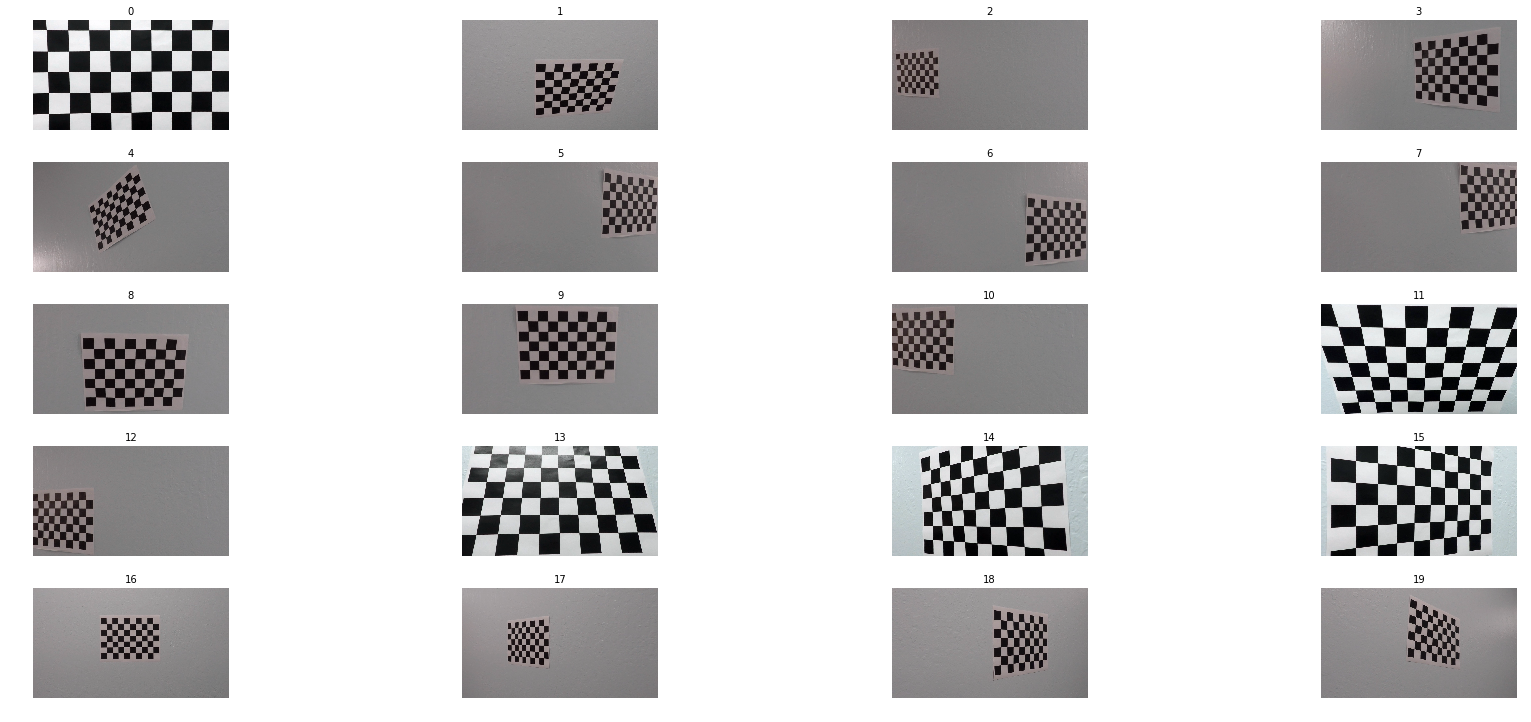

In [5]:
pkl_file = open( "./camera_cal/wide_dist_pickle.p", "rb" )
dist_pickle = pickle.load( pkl_file )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]
# print('mtx=', mtx)
# print('dis=',dist)
# dst = cv2.undistort(img, mtx, dist, None, mtx)
# cv2.imwrite('calibration_wide/test_undist.jpg',dst)

# Plot the result
fig, axs = plt.subplots(5, 4, figsize=(24, 10))  #axs[20]
axs = axs.flatten()

# fig.subplots_adjust(left=0.2, bottom=0.2, right=0.8, top=0.8, hspace=0.2, wspace=0.1)
fig.tight_layout()
# Step through the list and search for chessboard corners

for i, fname in enumerate(images):
    img = cv2.imread(fname)
    
    dst = cv2.undistort(img, mtx, dist, None, mtx)
#     cv2.imwrite('calibration_wide/test_undist.jpg',dst)
    
    axs[i].axis("off")
    axs[i].imshow(dst)
    axs[i].set_title(str(i), fontsize=10)